In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Build a baseline neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Kavishka Herath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 1.4143 - mae: 0.8498 - val_loss: 0.4620 - val_mae: 0.5001
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.4017 - mae: 0.4558 - val_loss: 0.4148 - val_mae: 0.4426
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3647 - mae: 0.4273 - val_loss: 0.3867 - val_mae: 0.4496
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4026 - mae: 0.4238 - val_loss: 0.3776 - val_mae: 0.4361
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3362 - mae: 0.4108 - val_loss: 0.3591 - val_mae: 0.4268
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3202 - mae: 0.4041 - val_loss: 0.3557 - val_mae: 0.4076
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3297 - mae: 0.3980 - val_loss: 0.3390 - val_mae: 0.4062
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3059 - mae: 0.3872 - val_loss: 0.3439 - val_mae: 0.4131
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/st

In [7]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.3f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2663 - mae: 0.3537
Test MAE: 0.356


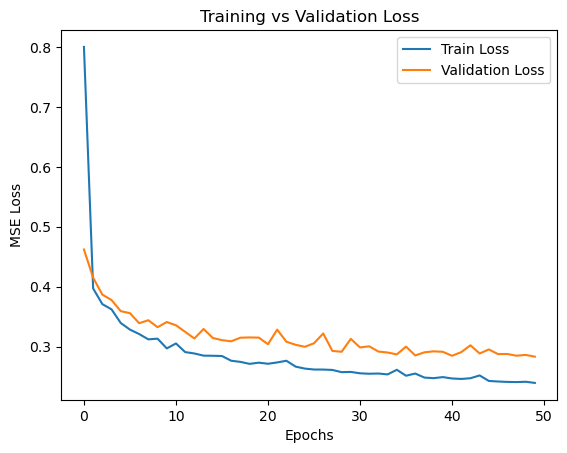

In [9]:
# visualize loss curves to diagnose training
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
